In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
import pandas as pd
import io
from google.colab import files

In [ ]:
uploaded = files.upload()

df = pd.read_csv(io.BytesIO(uploaded['scdataset_pcathenig_augmented.csv']))

Saving scdataset_pcathenig_augmented.csv to scdataset_pcathenig_augmented.csv


In [ ]:
df.head()

,label,Unnamed: 0,bytecode_len,Weight bytecode_character_6,Weight bytecode_character_0,Weight bytecode_character_8,Weight bytecode_character_4,Weight bytecode_character_5,Weight bytecode_character_2,Weight bytecode_character_1,...,Opcode weight EXP,Opcode weight LT,Opcode weight GT,Opcode weight EQ,Opcode weight ISZERO,Opcode weight AND,Opcode weight OR,Opcode weight NOT,Opcode weight CALLER,Opcode weight CALLVALUE
0,1,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1,117,8370,0.059498,0.151732,0.036201,0.013381,0.055078,0.039904,0.069534,...,0.000000,0.001223,0.003058,0.006116,0.031193,0.061774,0.000000,0.000000,0.011621,0.005505
3,1,120,2586,0.069606,0.176334,0.036736,0.030936,0.064192,0.020495,0.080046,...,0.024482,0.001883,0.000000,0.016949,0.054614,0.054614,0.009416,0.009416,0.007533,0.009416
4,1,193,7002,0.068695,0.184090,0.048272,0.017566,0.069123,0.043559,0.088546,...,0.001790,0.003580,0.003580,0.006563,0.031623,0.048926,0.000000,0.001193,0.005370,0.005967


In [ ]:
x = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [ ]:
print(f"Features (X) shape: {x.shape}")
print(f"Labels (y) shape: {y.shape}")


Features (X) shape: (52915, 37)
Labels (y) shape: (52915,)


In [ ]:
y

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
x

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.17000000e+02, 8.37000000e+03, 5.94982079e-02, ...,
        0.00000000e+00, 1.16207951e-02, 5.50458716e-03],
       ...,
       [3.31670000e+04, 3.57000000e+02, 9.70862624e-02, ...,
        0.00000000e+00, 4.36344575e-03, 1.62880773e-02],
       [3.40350000e+04, 1.66000000e+03, 7.41779774e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.44091016e-02],
       [3.36580000e+04, 1.79460000e+04, 7.84774596e-02, ...,
        4.98405514e-03, 2.07481943e-03, 4.60176143e-03]])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_41 (Dense)                     │ (None, 128)                 │           4,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,697 (116.00 KB)

 Trainable params: 29,697 (116.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=64)

Epoch 1/20
662/662 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8989 - loss: 0.2898 - val_accuracy: 0.9475 - val_loss: 0.1789
Epoch 2/20
662/662 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9462 - loss: 0.1804 - val_accuracy: 0.9499 - val_loss: 0.1736
Epoch 3/20
662/662 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9509 - loss: 0.1692 - val_accuracy: 0.9494 - val_loss: 0.1694
Epoch 4/20
662/662 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9501 - loss: 0.1664 - val_accuracy: 0.9545 - val_loss: 0.1607
Epoch 5/20
662/662 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9551 - loss: 0.1547 - val_accuracy: 0.9546 - val_loss: 0.1602
Epoch 6/20
662/662 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9545 - loss: 0.1523 - val_accuracy: 0.9548 - val_loss: 0.1548
Epoch 7/20
662/662 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9575 - loss: 0.1441 - val_accuracy: 0.9541 - val_loss: 0.1528
Epoch 8/20
662/662 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9549 - loss: 0.1487 - val_accuracy: 0.

In [ ]:
# Predict labels for the test set
y_pred = (model.predict(x_test) > 0.5).astype("int32")

331/331 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
# Calculate precision and recall
from sklearn.metrics import accuracy_score, precision_score, recall_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Precision: 0.9493
Recall: 0.9613


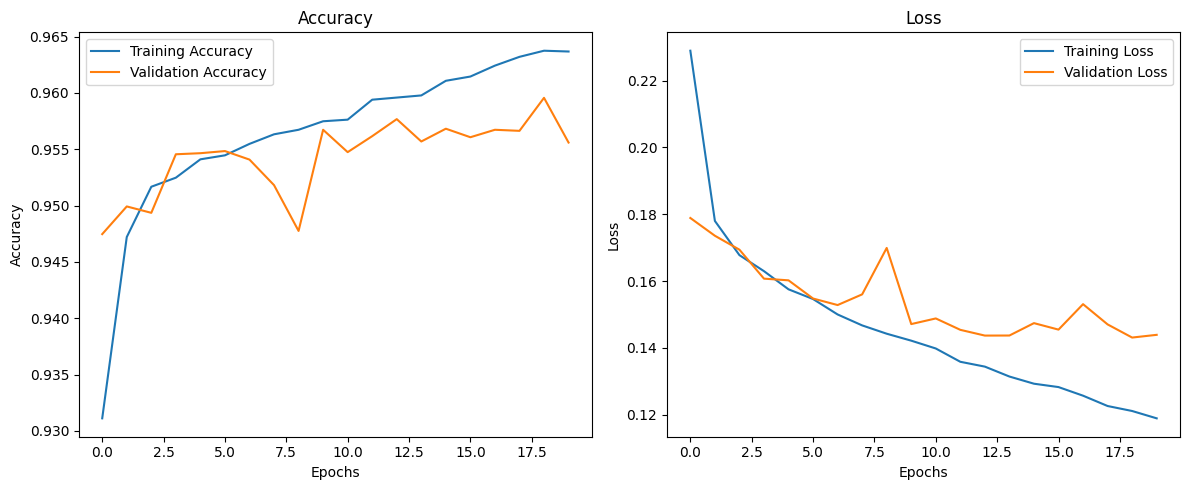

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
